In [1]:
import pandas as pd
from copy import deepcopy
import numpy as np

In [2]:
barcodes = pd.read_csv('https://raw.githubusercontent.com/juliendelile/MouseSpinalCordAtlas/master/output/phenoData_annotated.csv', sep = '\t', index_col = 0)

In [3]:
# genes = pd.read_csv('/Users/sophielohshvits/Desktop/UMI_count.tsv', sep = '\t', index_col = 0)

In [4]:
'''gene_names = ["ENSMUSG00000013033",  "ENSMUSG00000028184",
        "ENSMUSG00000037605", "ENSMUSG00000016150", "ENSMUSG00000049336",
        "ENSMUSG00000031561", "ENSMUSG00000048078", "ENSMUSG00000047787",
        "ENSMUSG00000047414", "ENSMUSG00000051379",
        "ENSMUSG00000024109"]
genes_OGS = {"ADGRL1": "ENSMUSG00000013033",  "ADGRL2":"ENSMUSG00000028184",
         "ADGRL3": "ENSMUSG00000037605", "TENM1":"ENSMUSG00000016150", "TENM2":"ENSMUSG00000049336",
         "TENM3": "ENSMUSG00000031561", "TENM4":"ENSMUSG00000048078", "FLRT1":"ENSMUSG00000047787",
         "FLRT2":"ENSMUSG00000047414", "FLRT3":"ENSMUSG00000051379",
         "NRXN1":"ENSMUSG00000024109"}

selected_genes = genes.reindex(gene_names)
selected_genes.to_csv("selected_genes.csv")'''

'gene_names = ["ENSMUSG00000013033",  "ENSMUSG00000028184",\n        "ENSMUSG00000037605", "ENSMUSG00000016150", "ENSMUSG00000049336",\n        "ENSMUSG00000031561", "ENSMUSG00000048078", "ENSMUSG00000047787",\n        "ENSMUSG00000047414", "ENSMUSG00000051379",\n        "ENSMUSG00000024109"]\ngenes_OGS = {"ADGRL1": "ENSMUSG00000013033",  "ADGRL2":"ENSMUSG00000028184",\n         "ADGRL3": "ENSMUSG00000037605", "TENM1":"ENSMUSG00000016150", "TENM2":"ENSMUSG00000049336",\n         "TENM3": "ENSMUSG00000031561", "TENM4":"ENSMUSG00000048078", "FLRT1":"ENSMUSG00000047787",\n         "FLRT2":"ENSMUSG00000047414", "FLRT3":"ENSMUSG00000051379",\n         "NRXN1":"ENSMUSG00000024109"}\n\nselected_genes = genes.reindex(gene_names)\nselected_genes.to_csv("selected_genes.csv")'

In [5]:
selected_genes = pd.read_csv('/Users/sophielohshvits/Desktop/selected_genes.csv', sep = ',', index_col = 0)

In [6]:
selected_genes

,AAACCTGAGCAGACTG-1,AAACCTGCAAGCGAGT-1,AAACCTGGTCCCTACT-1,AAACCTGTCAGCACAT-1,AAACCTGTCCCTTGCA-1,AAACCTGTCTGTACGA-1,AAACGGGAGATAGGAG-1,AAACGGGAGGCCATAG-1,AAACGGGAGTCGAGTG-1,AAACGGGCAATGGACG-1,...,TTTGGTTAGTTAAGTG-11,TTTGGTTTCAGTACGT-11,TTTGGTTTCTCGCATC-11,TTTGGTTTCTGCCCTA-11,TTTGTCAAGATGTGGC-11,TTTGTCAAGCTATGCT-11,TTTGTCAGTAGCTAAA-11,TTTGTCATCAGGTTCA-11,TTTGTCATCGGAATCT-11,TTTGTCATCGTGGTCG-11
ENSMUSG00000013033,0,0,1,0,0,0,0,0,0,2,...,0,0,1,0,0,1,0,0,0,0
ENSMUSG00000028184,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2
ENSMUSG00000037605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
ENSMUSG00000016150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000049336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000031561,0,1,0,0,0,0,1,1,0,1,...,0,0,0,1,1,0,0,1,0,0
ENSMUSG00000048078,0,0,0,0,0,0,1,0,0,2,...,0,0,1,0,0,0,0,0,0,0
ENSMUSG00000047787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ENSMUSG00000047414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000051379,0,1,0,1,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0


In [7]:
subtypes_by_barcodes = barcodes.loc[:,['Neuron_subtypes', 'Type_step2_unique']]
subtypes_by_barcodes = subtypes_by_barcodes.apply(lambda x: x['Type_step2_unique'] if pd.isna(x['Neuron_subtypes']) else 
                                   x['Neuron_subtypes'], axis=1)
#выбираем ячейку с типом нейронов, если она непустая и со вторым измерением в противном случае
subtypes_by_barcodes[subtypes_by_barcodes.isna()] = 'Not_Defined'

In [8]:
genes_renamed_columns = deepcopy(selected_genes)

new_cols = {key: value for key, value in zip(genes_renamed_columns.columns.values, subtypes_by_barcodes.values)}
# ключ -- баркод,  значние -- тип клетки

# сопоставляем баркод и тип клетки:
genes_renamed_columns.rename(columns = new_cols, inplace=True)

In [9]:
genes_cell_types_counts = genes_renamed_columns.groupby(lambda x: x, axis=1).sum()

In [10]:
genes_cell_types_counts

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,FP,Hematopoeitic,MN,MN.1,MN.2,MN.3,...,dp3,dp4,dp4.1,dp5,dp6,p0,p1,p2,p3,pMN
ENSMUSG00000013033,80,2,57,6,13,7,146,75,21,27,...,182,62,138,9,61,49,26,63,10,37
ENSMUSG00000028184,129,4,100,8,69,15,77,48,20,39,...,538,189,273,27,266,174,74,156,33,132
ENSMUSG00000037605,20,2,19,1,19,1,125,52,12,28,...,121,52,107,20,38,36,28,52,13,42
ENSMUSG00000016150,0,0,0,1,0,0,24,1,1,6,...,2,1,1,0,0,0,1,0,0,0
ENSMUSG00000049336,0,0,4,0,1,0,58,22,8,9,...,30,17,32,2,15,4,5,5,3,8
ENSMUSG00000031561,8,4,26,2,87,3,33,193,40,27,...,340,105,128,21,188,137,72,145,50,119
ENSMUSG00000048078,5,6,24,4,45,1,58,48,11,45,...,159,73,118,28,151,143,69,124,31,138
ENSMUSG00000047787,1,0,3,1,2,1,34,3,0,13,...,8,5,22,3,5,6,1,3,1,5
ENSMUSG00000047414,98,2,95,0,3,1,39,15,7,27,...,46,20,46,2,18,12,6,15,2,19
ENSMUSG00000051379,9,0,15,5,23,0,49,17,9,13,...,242,70,169,13,109,63,31,54,27,39


In [11]:
depth = pd.read_csv('https://raw.githubusercontent.com/eentartetekunst/latrophilines/main/depth.tsv', sep = '\t', index_col = 0)

In [12]:
depth = depth.T
depth

,AAACCTGAGCAGACTG-1,AAACCTGCAAGCGAGT-1,AAACCTGGTCCCTACT-1,AAACCTGTCAGCACAT-1,AAACCTGTCCCTTGCA-1,AAACCTGTCTGTACGA-1,AAACGGGAGATAGGAG-1,AAACGGGAGGCCATAG-1,AAACGGGAGTCGAGTG-1,AAACGGGCAATGGACG-1,...,TTTGGTTAGTTAAGTG-11,TTTGGTTTCAGTACGT-11,TTTGGTTTCTCGCATC-11,TTTGGTTTCTGCCCTA-11,TTTGTCAAGATGTGGC-11,TTTGTCAAGCTATGCT-11,TTTGTCAGTAGCTAAA-11,TTTGTCATCAGGTTCA-11,TTTGTCATCGGAATCT-11,TTTGTCATCGTGGTCG-11
Depth,7427,11510,6830,9062,8191,9477,6653,9951,4619,17183,...,4112,3433,4339,2484,5169,4620,3850,6844,2853,2302


In [13]:
subtypes_by_barcodes

AAACCTGAGCAGACTG-1      Mesoderm V
AAACCTGCAAGCGAGT-1     Not_Defined
AAACCTGGTCCCTACT-1     Not_Defined
AAACCTGTCAGCACAT-1     Not_Defined
AAACCTGTCCCTTGCA-1      Mesoderm V
                          ...     
TTTGTCAAGCTATGCT-11          dl2.1
TTTGTCAGTAGCTAAA-11          dl4.6
TTTGTCATCAGGTTCA-11    Not_Defined
TTTGTCATCGGAATCT-11    Null_Neuron
TTTGTCATCGTGGTCG-11          dl4.3
Length: 41025, dtype: object

In [14]:
depth_cols = {key: value for key, value in zip(depth.columns.values, subtypes_by_barcodes.values)}
depth.rename(columns = depth_cols, inplace=True)

In [15]:
celltypes_depth = depth.groupby(lambda x: x, axis=1).sum()
celltypes_depth

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,FP,Hematopoeitic,MN,MN.1,MN.2,MN.3,...,dp3,dp4,dp4.1,dp5,dp6,p0,p1,p2,p3,pMN
Depth,2070752,1966399,4617750,5355128,1193671,983432,1372024,2832937,900253,912442,...,8775319,3483044,6494052,495116,3812233,2804447,1460868,3063584,980078,2488149


In [16]:
celltypes_norm = genes_cell_types_counts.div(celltypes_depth.values, axis=1) * 1e6

In [17]:
celltypes_norm.to_csv('normirovannie_geny_no_tipam.csv')
celltypes_norm

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,FP,Hematopoeitic,MN,MN.1,MN.2,MN.3,...,dp3,dp4,dp4.1,dp5,dp6,p0,p1,p2,p3,pMN
ENSMUSG00000013033,38.633308,1.017088,12.343674,1.120421,10.890773,7.117930,106.412133,26.474292,23.326776,29.590922,...,20.739987,17.800522,21.250215,18.177558,16.001121,17.472250,17.797638,20.564150,10.203270,14.870492
ENSMUSG00000028184,62.296209,2.034175,21.655568,1.493895,57.804873,15.252707,56.121467,16.943547,22.215977,42.742443,...,61.308313,54.262880,42.038468,54.532675,69.775378,62.044317,50.654816,50.920752,33.670789,53.051485
ENSMUSG00000037605,9.658327,1.017088,4.114558,0.186737,15.917284,1.016847,91.106278,18.355509,13.329586,30.686882,...,13.788673,14.929470,16.476616,40.394574,9.967911,12.836755,19.166687,16.973584,13.264250,16.880018
ENSMUSG00000016150,0.000000,0.000000,0.000000,0.186737,0.000000,0.000000,17.492405,0.352991,1.110799,6.575760,...,0.227912,0.287105,0.153987,0.000000,0.000000,0.000000,0.684525,0.000000,0.000000,0.000000
ENSMUSG00000049336,0.000000,0.000000,0.866223,0.000000,0.837752,0.000000,42.273313,7.765792,8.886391,9.863641,...,3.418679,4.880788,4.927586,4.039457,3.934702,1.426306,3.422623,1.632075,3.060981,3.215242
ENSMUSG00000031561,3.863331,2.034175,5.630448,0.373474,72.884404,3.050541,24.052057,68.127177,44.431954,29.590922,...,38.745030,30.146045,19.710344,42.414303,49.314929,48.850986,49.285767,47.330186,51.016348,47.826718
ENSMUSG00000048078,2.414582,3.051263,5.197336,0.746948,37.698830,1.016847,42.273313,16.943547,12.218787,49.318203,...,18.118999,20.958679,18.170474,56.552404,39.609331,50.990445,47.232193,40.475469,31.630136,55.462916
ENSMUSG00000047787,0.482916,0.000000,0.649667,0.186737,1.675504,1.016847,24.780908,1.058972,0.000000,14.247481,...,0.911648,1.435526,3.387715,6.059186,1.311567,2.139459,0.684525,0.979245,1.020327,2.009526
ENSMUSG00000047414,47.325802,1.017088,20.572790,0.000000,2.513255,1.016847,28.425159,5.294858,7.775592,29.590922,...,5.241975,5.742104,7.083405,4.039457,4.721642,4.278918,4.107147,4.896226,2.040654,7.636199
ENSMUSG00000051379,4.346247,0.000000,3.248335,0.933684,19.268291,0.000000,35.713661,6.000839,9.997190,14.247481,...,27.577345,20.097363,26.023814,26.256473,28.592166,22.464322,21.220261,17.626414,27.548828,15.674302


In [18]:
log_celltypes_norm = celltypes_norm.apply(lambda x: x + 1, axis=1)
log_celltypes_norm = np.log2(log_celltypes_norm)
log_celltypes_norm

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,FP,Hematopoeitic,MN,MN.1,MN.2,MN.3,...,dp3,dp4,dp4.1,dp5,dp6,p0,p1,p2,p3,pMN
ENSMUSG00000013033,5.308641,1.012274,3.738084,1.084351,3.571771,3.021112,6.747013,4.780010,4.604473,4.935032,...,4.442279,4.232701,4.475747,4.261347,4.087558,4.207288,4.232479,4.430563,3.485848,3.988275
ENSMUSG00000028184,5.984047,1.601304,4.501794,1.318401,5.877864,4.022608,5.835961,4.165393,4.537046,5.450962,...,5.961353,5.788239,5.427555,5.795265,6.145176,5.978294,5.690831,5.698239,5.115649,5.756262
ENSMUSG00000037605,3.413909,1.012274,2.354610,0.247000,4.080426,1.012102,6.525228,4.274672,3.840925,4.985814,...,3.886421,3.993626,4.127354,5.371370,3.455217,3.790434,4.333902,4.167806,3.834332,4.160276
ENSMUSG00000016150,0.000000,0.000000,0.000000,0.247000,0.000000,0.000000,4.208861,0.436152,1.077789,2.921391,...,0.296207,0.364130,0.206627,0.000000,0.000000,0.000000,0.752341,0.000000,0.000000,0.000000
ENSMUSG00000049336,0.000000,0.000000,0.900121,0.000000,0.877942,0.000000,5.435406,3.131884,3.305444,3.441436,...,2.143615,2.556010,2.567445,2.333268,2.302963,1.278762,2.144902,1.396201,2.021828,2.075615
ENSMUSG00000031561,2.281945,1.601304,2.729106,0.457829,6.207198,2.018115,4.646857,6.111181,5.505635,4.935032,...,5.312703,4.960977,4.372280,5.440099,5.652915,5.639550,5.652078,5.594853,5.700893,5.609599
ENSMUSG00000048078,1.771709,2.018372,2.631648,0.804836,5.274218,1.012102,5.435406,4.165393,3.724518,5.653009,...,4.256935,4.456719,4.260814,5.846804,5.343739,5.700175,5.591925,5.374186,5.028133,5.819232
ENSMUSG00000047787,0.568437,0.000000,0.722175,0.247000,1.419810,1.012102,4.688231,1.041924,0.000000,3.930499,...,0.934817,1.284233,2.133470,2.819502,1.208871,1.650516,0.752341,0.984950,1.014589,1.589536
ENSMUSG00000047414,5.594722,1.012274,4.431141,0.000000,1.812808,1.012102,4.878978,2.654174,3.133496,4.935032,...,2.642003,2.753199,3.014963,2.333268,2.516429,2.400242,2.352518,2.559792,1.604382,3.110396
ENSMUSG00000051379,2.418527,0.000000,2.086898,0.951352,4.341153,0.000000,5.198245,2.807528,3.459063,3.930499,...,4.836800,4.398991,4.756159,4.768527,4.887143,4.552397,4.473804,4.219278,4.835360,4.059555


In [20]:
log_celltypes_norm = log_celltypes_norm.rename(index={"ENSMUSG00000013033":'ADGRL1',
"ENSMUSG00000028184": 'ADGRL2',
"ENSMUSG00000037605": 'ADGRL3',
"ENSMUSG00000016150": 'TENM1',
"ENSMUSG00000049336": 'TENM2',
"ENSMUSG00000031561": 'TENM3',
"ENSMUSG00000048078": 'TENM4',
"ENSMUSG00000047787": 'FLRT1',
"ENSMUSG00000047414": 'FLRT2',
"ENSMUSG00000051379": 'FLRT3',
"ENSMUSG00000024109": 'NRXN1'})
# а как это сделать по-человечески?

log_celltypes_norm

,Blood,Erythrocytes,Erythrocytes II,Erythropoeitic,FP,Hematopoeitic,MN,MN.1,MN.2,MN.3,...,dp3,dp4,dp4.1,dp5,dp6,p0,p1,p2,p3,pMN
ADGRL1,5.308641,1.012274,3.738084,1.084351,3.571771,3.021112,6.747013,4.780010,4.604473,4.935032,...,4.442279,4.232701,4.475747,4.261347,4.087558,4.207288,4.232479,4.430563,3.485848,3.988275
ADGRL2,5.984047,1.601304,4.501794,1.318401,5.877864,4.022608,5.835961,4.165393,4.537046,5.450962,...,5.961353,5.788239,5.427555,5.795265,6.145176,5.978294,5.690831,5.698239,5.115649,5.756262
ADGRL3,3.413909,1.012274,2.354610,0.247000,4.080426,1.012102,6.525228,4.274672,3.840925,4.985814,...,3.886421,3.993626,4.127354,5.371370,3.455217,3.790434,4.333902,4.167806,3.834332,4.160276
TENM1,0.000000,0.000000,0.000000,0.247000,0.000000,0.000000,4.208861,0.436152,1.077789,2.921391,...,0.296207,0.364130,0.206627,0.000000,0.000000,0.000000,0.752341,0.000000,0.000000,0.000000
TENM2,0.000000,0.000000,0.900121,0.000000,0.877942,0.000000,5.435406,3.131884,3.305444,3.441436,...,2.143615,2.556010,2.567445,2.333268,2.302963,1.278762,2.144902,1.396201,2.021828,2.075615
TENM3,2.281945,1.601304,2.729106,0.457829,6.207198,2.018115,4.646857,6.111181,5.505635,4.935032,...,5.312703,4.960977,4.372280,5.440099,5.652915,5.639550,5.652078,5.594853,5.700893,5.609599
TENM4,1.771709,2.018372,2.631648,0.804836,5.274218,1.012102,5.435406,4.165393,3.724518,5.653009,...,4.256935,4.456719,4.260814,5.846804,5.343739,5.700175,5.591925,5.374186,5.028133,5.819232
FLRT1,0.568437,0.000000,0.722175,0.247000,1.419810,1.012102,4.688231,1.041924,0.000000,3.930499,...,0.934817,1.284233,2.133470,2.819502,1.208871,1.650516,0.752341,0.984950,1.014589,1.589536
FLRT2,5.594722,1.012274,4.431141,0.000000,1.812808,1.012102,4.878978,2.654174,3.133496,4.935032,...,2.642003,2.753199,3.014963,2.333268,2.516429,2.400242,2.352518,2.559792,1.604382,3.110396
FLRT3,2.418527,0.000000,2.086898,0.951352,4.341153,0.000000,5.198245,2.807528,3.459063,3.930499,...,4.836800,4.398991,4.756159,4.768527,4.887143,4.552397,4.473804,4.219278,4.835360,4.059555


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

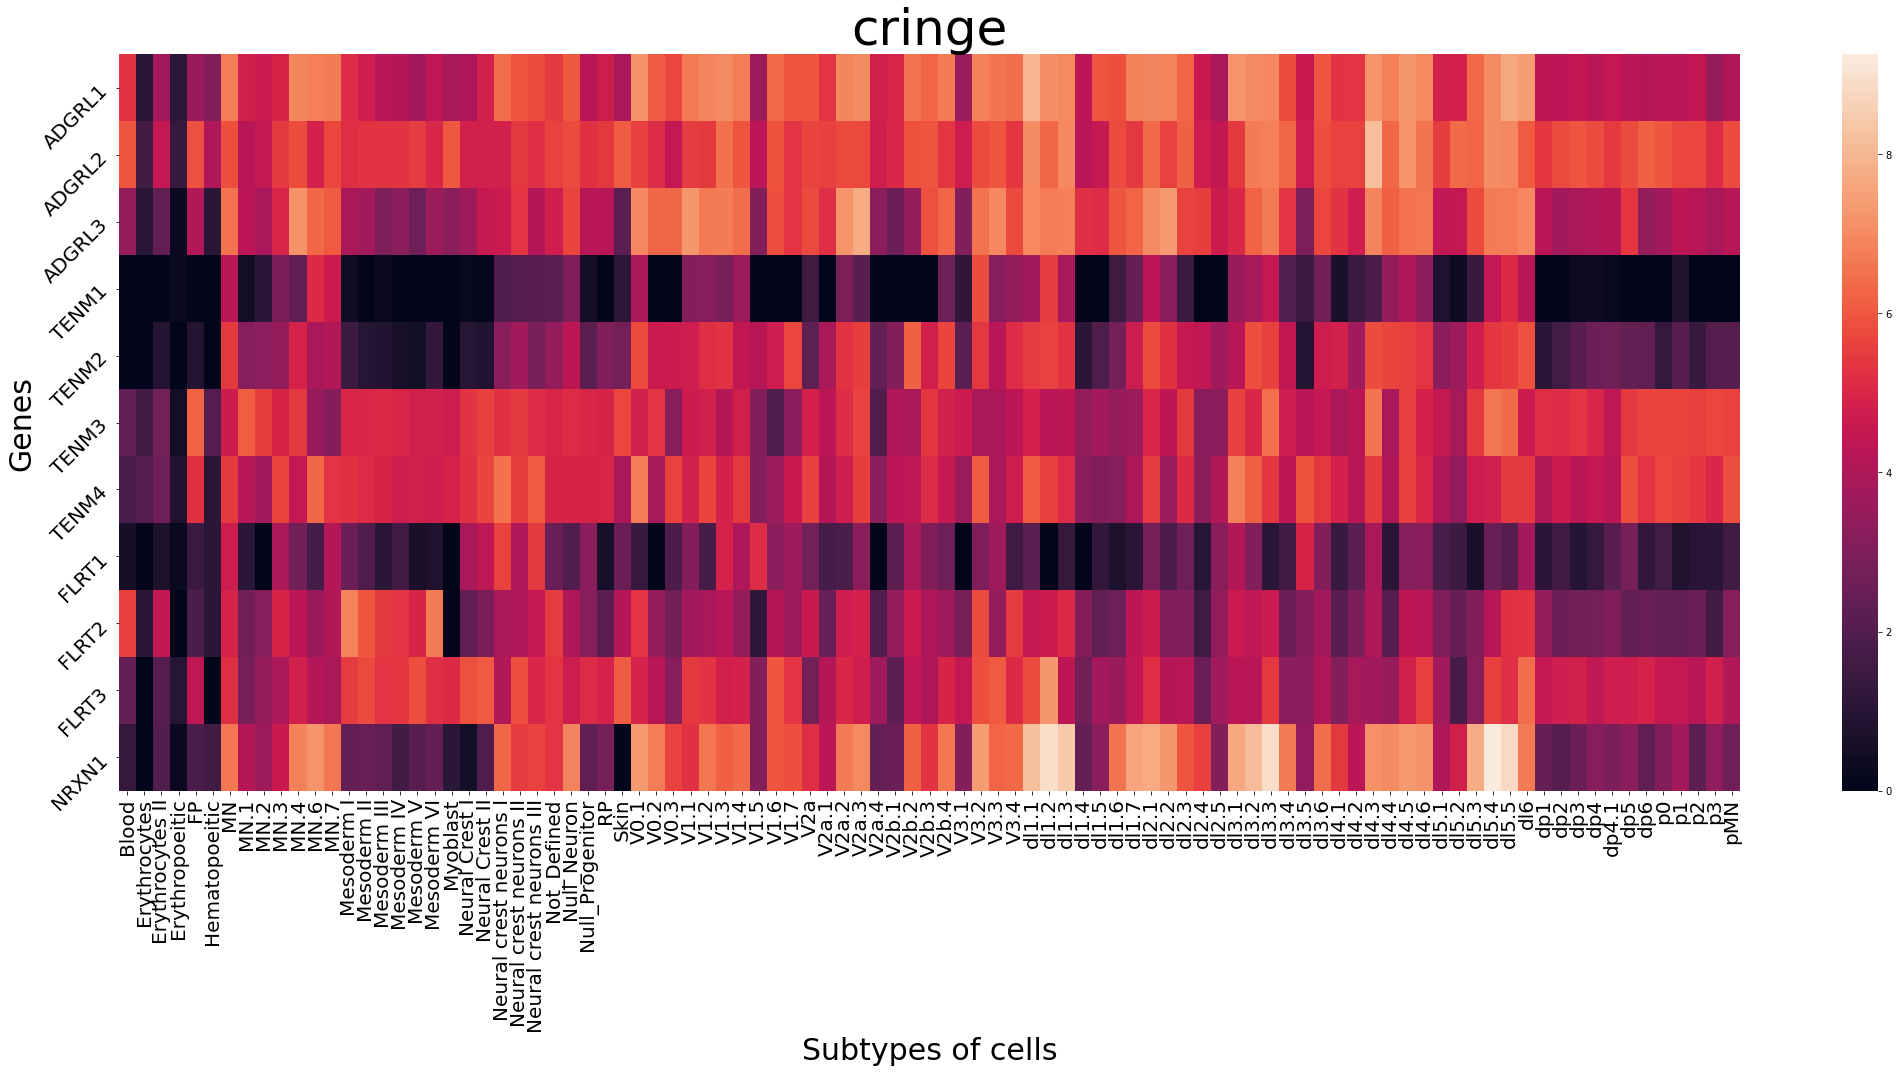

In [47]:
figure(figsize=(30,15))

b = sns.heatmap(log_celltypes_norm.iloc[:, :])

b.axes.set_title("cringe",fontsize=50)
b.set_xlabel("Subtypes of cells",fontsize=30)
b.set_ylabel("Genes",fontsize=30)
b.tick_params(labelsize=20)
plt.xticks(rotation=90)             
plt.yticks(rotation=45)             


plt.subplots_adjust(bottom = 0.15)


plt.tight_layout()

